# Анализ данных по Ковид-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
data = pd.read_csv('covid_19_data.csv')
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
data.shape

(156292, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156292 entries, 0 to 156291
Data columns (total 8 columns):
SNo                156292 non-null int64
ObservationDate    156292 non-null object
Province/State     111979 non-null object
Country/Region     156292 non-null object
Last Update        156292 non-null object
Confirmed          156292 non-null float64
Deaths             156292 non-null float64
Recovered          156292 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ MB


In [5]:
# проверка ключей
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [23]:
# удаление ненужных столбцов по ключам
# 1 способ (с присвоением в переменную) drop columns 1 and rows
data = data.drop(['SNo', 'Last Update'], axis=1)
# 2 способ (без присвоением в переменную)
# data.drop(['SNo', 'Last Update'], axis=1, inplace=True)
data.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Date
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,2020-01-22
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,2020-01-22
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0,2020-01-22
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0,2020-01-22
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0,2020-01-22


In [7]:
# проверка на дубликаты
data.duplicated(['ObservationDate', 'Country/Region', 'Province/State']).sum()

4

In [8]:
# удаление дубликатов
data = data.drop_duplicates(['ObservationDate', 'Country/Region', 'Province/State'])

In [9]:
data.duplicated(['ObservationDate', 'Country/Region', 'Province/State']).sum()

0

In [10]:
# изучение страны
country_array = data['Country/Region'].unique()

for country in np.sort(country_array):
    print(country)

 Azerbaijan
('St. Martin',)
Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Channel Islands
Chile
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Faroe Islands
Fiji
Finland
France
French Guiana
Gabon
Gambia
Gambia, The
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaic

In [11]:
# изучаем Others
# применяем маскирование
data[data['Country/Region'] == 'Others']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
933,934,02/07/2020,Cruise Ship,Others,2020-02-07T16:33:03,61.0,0.0,0.0
1005,1006,02/08/2020,Cruise Ship,Others,2020-02-07T16:33:03,61.0,0.0,0.0
1077,1078,02/09/2020,Diamond Princess cruise ship,Others,2020-02-09T06:13:11,64.0,0.0,0.0
1143,1144,02/10/2020,Diamond Princess cruise ship,Others,2020-02-10T16:03:12,135.0,0.0,0.0
1215,1216,02/11/2020,Diamond Princess cruise ship,Others,2020-02-10T16:03:12,135.0,0.0,0.0
1286,1287,02/12/2020,Diamond Princess cruise ship,Others,2020-02-12T04:23:38,175.0,0.0,0.0
1359,1360,02/13/2020,Diamond Princess cruise ship,Others,2020-02-12T04:23:38,175.0,0.0,0.0
1433,1434,02/14/2020,Diamond Princess cruise ship,Others,2020-02-14T00:13:23,218.0,0.0,0.0
1506,1507,02/15/2020,Diamond Princess cruise ship,Others,2020-02-15T17:03:04,285.0,0.0,0.0
1578,1579,02/16/2020,Diamond Princess cruise ship,Others,2020-02-16T03:43:02,355.0,0.0,0.0


In [12]:
# приводим в порядок даты
data['ObservationDate']

0         01/22/2020
1         01/22/2020
2         01/22/2020
3         01/22/2020
4         01/22/2020
             ...    
156287    11/15/2020
156288    11/15/2020
156289    11/15/2020
156290    11/15/2020
156291    11/15/2020
Name: ObservationDate, Length: 156288, dtype: object

In [13]:
data['ObservationDate'][0]

'01/22/2020'

In [14]:
# пример метода конвертации даты
pd.to_datetime('01/22/2020').date()

datetime.date(2020, 1, 22)

In [15]:
#  конвертация временных данных в тип timeStamp
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['ObservationDate']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
156287   2020-11-15
156288   2020-11-15
156289   2020-11-15
156290   2020-11-15
156291   2020-11-15
Name: ObservationDate, Length: 156288, dtype: datetime64[ns]

In [16]:
data['ObservationDate'][0]

Timestamp('2020-01-22 00:00:00')

In [17]:
# извлечение даты из Timestamp (исключение временных данных 00:00:00)
data['Date'] = data['ObservationDate'].apply(lambda el: el.date())


In [18]:
# пример работы метода apply()

# функция
# f = lambda x: x*2

# s =pd.Series([10,20,30]).apply(f)
# s

In [19]:
data['Date']

0         2020-01-22
1         2020-01-22
2         2020-01-22
3         2020-01-22
4         2020-01-22
             ...    
156287    2020-11-15
156288    2020-11-15
156289    2020-11-15
156290    2020-11-15
156291    2020-11-15
Name: Date, Length: 156288, dtype: object

In [20]:
data['Date'][0]

datetime.date(2020, 1, 22)

In [21]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [24]:
# группировка данных по датам по всему мира
data.groupby(['Date']).sum()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0
2020-11-12,52740580.0,1293954.0,34149223.0
2020-11-13,53365400.0,1302556.0,34450332.0


In [26]:
# группировка данных вокруг стран и дат
total_data = data.groupby(['Country/Region', 'Date']).sum()
total_data.loc['Russia', :] 

,Confirmed,Deaths,Recovered
Date,,,
2020-01-31,2.0,0.0,0.0
2020-02-01,2.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,2.0,0.0,0.0
2020-02-04,2.0,0.0,0.0
...,...,...,...
2020-11-11,1822345.0,31326.0,1360049.0
2020-11-12,1843678.0,31755.0,1378463.0
2020-11-13,1865395.0,32156.0,1396851.0


In [28]:
# сводные данные по отдельным странам
total_data.groupby('Country/Region').max().loc[['Russia', 'US', 'Italy'], :]

,Confirmed,Deaths,Recovered
Country/Region,,,
Russia,1910149.0,32885.0,1429565.0
US,11036935.0,246214.0,4174884.0
Italy,1178529.0,45229.0,420810.0


In [29]:
# сортировка данных 
total_data.groupby('Country/Region').max().sort_values(by='Confirmed', ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,11036935.0,246214.0,4174884.0
India,8845127.0,130070.0,8249579.0
Brazil,5863093.0,165798.0,5279452.0
France,1915713.0,42601.0,139760.0
Russia,1910149.0,32885.0,1429565.0
...,...,...,...
The Gambia,1.0,0.0,0.0
The Bahamas,1.0,0.0,0.0
North Ireland,1.0,0.0,0.0


In [30]:
# конкретно по стране посмтотреть
total_data.groupby('Country/Region').max().sort_values(by='Confirmed', ascending=False).loc['Australia', :]

Confirmed    27749.0
Deaths         907.0
Recovered    25468.0
Name: Australia, dtype: float64

## Визуализация

In [31]:
# группировка данных по датам по всему мира
df_by_date = data.groupby(['Date']).sum() #.reset_index()
df_by_date

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0
2020-11-12,52740580.0,1293954.0,34149223.0
2020-11-13,53365400.0,1302556.0,34450332.0


In [33]:
df_by_date.index

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31,
       ...
       2020-11-06, 2020-11-07, 2020-11-08, 2020-11-09, 2020-11-10, 2020-11-11,
       2020-11-12, 2020-11-13, 2020-11-14, 2020-11-15],
      dtype='object', name='Date', length=299)

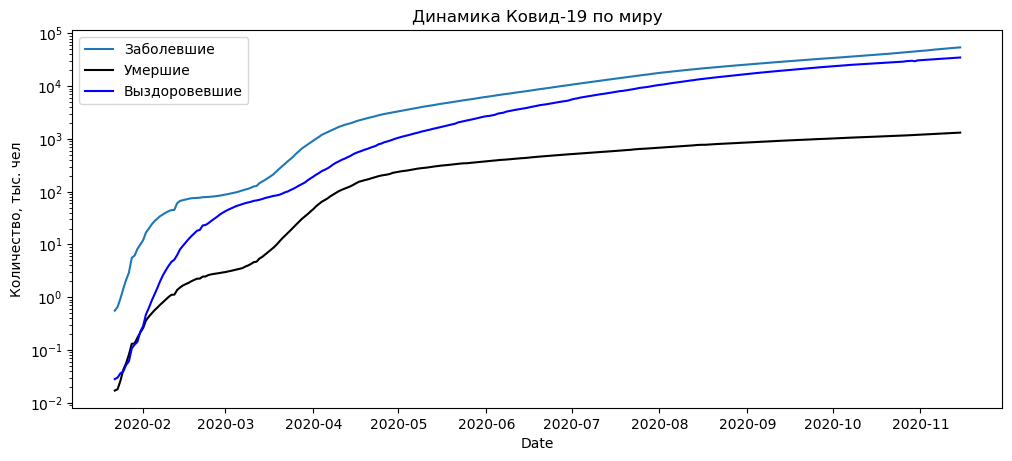

In [44]:
# Динамика пандемии по всему миру
plt.figure(dpi=100, figsize=[12.0,5.0])

plt.yscale('log') # логарифмирование

plt.plot(df_by_date.index, df_by_date['Confirmed']/1000, label='Заболевшие')
plt.plot(df_by_date.index, df_by_date['Deaths']/1000, 'k', label='Умершие')
plt.plot(df_by_date.index, df_by_date['Recovered']/1000, 'b', label='Выздоровевшие')

plt.legend()
plt.title('Динамика Ковид-19 по миру')
plt.xlabel('Date')
plt.ylabel('Количество, тыс. чел')

plt.show()

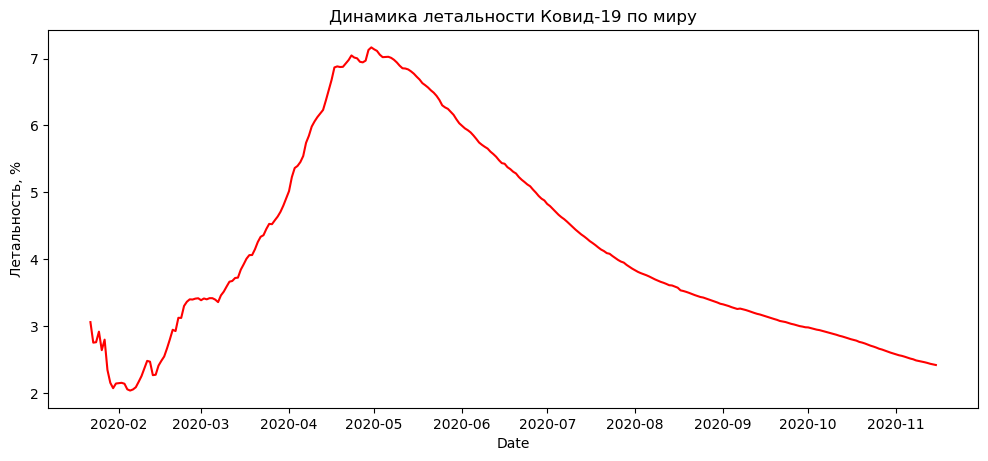

In [45]:
plt.figure(dpi=100, figsize=[12.0,5.0])

# plt.yscale('log') # логарифмирование

letal_data = (df_by_date['Deaths'] / df_by_date['Confirmed'])*100

plt.plot(df_by_date.index, letal_data, 'r') 


plt.title('Динамика летальности Ковид-19 по миру')
plt.xlabel('Date')
plt.ylabel('Летальность, %')

plt.show()

- Анализ новых случаев заболевания

In [50]:
# Вычисляем каждодневные данные заболеваемости по миру

# df_by_date['New cases'] = 

new_cases = []

for idx in range(df_by_date.shape[0]):
    if idx == 0:
        new_cases.append(df_by_date['Confirmed'][idx])
    else:
        new_cases.append(df_by_date['Confirmed'][idx] - df_by_date['Confirmed'][idx-1])

new_cases
df_by_date['New cases'] = pd.Series(new_cases, index=df_by_date.index)
df_by_date

,Confirmed,Deaths,Recovered,New cases
Date,,,,
2020-01-22,555.0,17.0,28.0,555.0
2020-01-23,653.0,18.0,30.0,98.0
2020-01-24,941.0,26.0,36.0,288.0
2020-01-25,1438.0,42.0,39.0,497.0
2020-01-26,2118.0,56.0,52.0,680.0
...,...,...,...,...
2020-11-11,52126793.0,1284472.0,33926351.0,666053.0
2020-11-12,52740580.0,1293954.0,34149223.0,613787.0
2020-11-13,53365400.0,1302556.0,34450332.0,624820.0


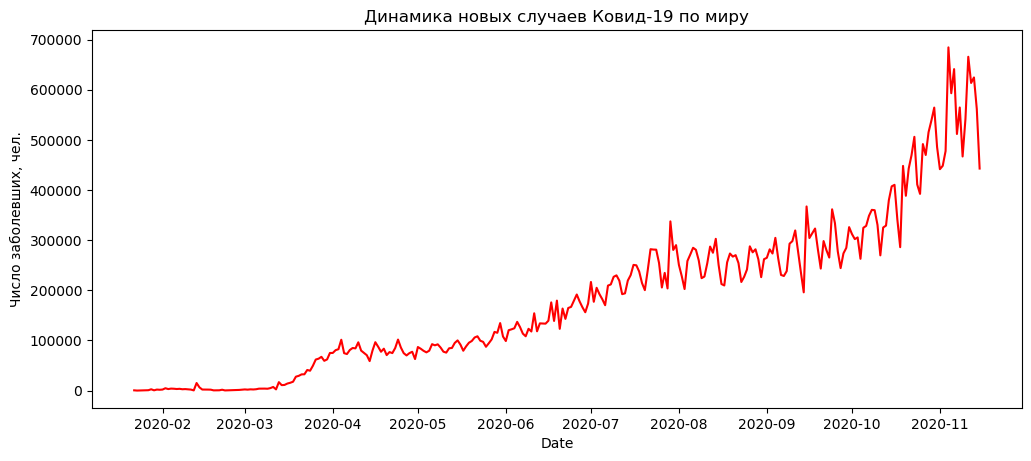

In [51]:
plt.figure(dpi=100, figsize=[12.0,5.0])

# plt.yscale('log') # логарифмирование



plt.plot(df_by_date.index, df_by_date['New cases'], 'r') 


plt.title('Динамика новых случаев Ковид-19 по миру')
plt.xlabel('Date')
plt.ylabel('Число заболевших, чел.')

plt.show()